# Feature Importance in Random Forest

## 1. What is Feature Importance?

In machine learning, **feature importance** measures how useful each input feature (column) is for making predictions **according to a trained model**.

Formally, for a dataset  
$X = [x_1, x_2, \dots, x_p]$  
feature importance assigns a score:

$$
I_j \ge 0 \quad \text{for } j = 1,2,\dots,p
$$

such that:

$$
\sum_{j=1}^{p} I_j = 1
$$

These scores tell us **which features matter most** and **which can potentially be removed**.

---

## 2. Why Feature Importance is Needed

### (a) Feature Selection
- Large number of features → slower training + overfitting
- Keep **important features**, drop useless ones

### (b) Model Interpretability
- Helps explain *why* a model made a prediction
- Crucial in domains like **banking, healthcare, finance**

### (c) Debugging Models
- Detects noisy or irrelevant columns
- Identifies data leakage or suspicious features

---

## 3. Example Intuition (MNIST Digits)

- MNIST images are $28 \times 28$ pixels
- Each pixel = one feature → $784$ features
- Digits are written mostly in the **center**
- Border pixels carry little information

Random Forest automatically learns:
- Center pixels → high importance
- Border pixels → low importance

---

## 4. Feature Importance in Random Forest (Code)

```python
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = load_digits(return_X_y=True)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X, y)

importances = rf.feature_importances_
```

- `importances[i]` → importance of feature $i$
- Length = number of features
- Values are normalized

---

## 5. Visualizing Feature Importance (Images)

```python
import matplotlib.pyplot as plt

img = importances.reshape(8, 8)

plt.imshow(img, cmap='hot')
plt.colorbar()
plt.title("Feature Importance Heatmap")
plt.show()
```

Brighter pixels = more important

---

## 6. How Decision Trees Compute Feature Importance

### Step 1: Impurity Measure

For classification (Gini):

$$
G = 1 - \sum_{k=1}^{K} p_k^2
$$

For entropy:

$$
H = -\sum_{k=1}^{K} p_k \log p_k
$$

---

### Step 2: Impurity Decrease at a Node

For a split at node $t$:

$$
\Delta I(t) =
I(t) -
\left(
\frac{n_L}{n_t} I(L)
+
\frac{n_R}{n_t} I(R)
\right)
$$

where:
- $n_t$ = samples at parent node
- $L, R$ = left and right child nodes

---

### Step 3: Node Importance

$$
NI(t) = \frac{n_t}{N} \cdot \Delta I(t)
$$

---

### Step 4: Feature Importance in a Tree

For feature $j$:

$$
FI_j^{(tree)} = \sum_{t \in T_j} NI(t)
$$

where $T_j$ = nodes split using feature $j$

---

## 7. Feature Importance in Random Forest

Random Forest = average over trees:

$$
FI_j^{(RF)} = \frac{1}{M} \sum_{m=1}^{M} FI_{j}^{(tree_m)}
$$

---

## 8. Important Properties

- Always non-negative
- Normalized:

$$
\sum_j FI_j = 1
$$

- Depends on:
  - Split frequency
  - Impurity reduction
  - Number of samples

---

## 9. Why High-Cardinality Features Can Mislead

Features with many unique values:
- Offer many possible splits
- Artificially reduce impurity
- Appear more important than they truly are

⚠️ This is a **known bias** of impurity-based importance.

---

## 10. Permutation Importance (Safer Alternative)

### Idea
- Shuffle one feature
- Measure drop in accuracy

### Formula

$$
PI_j = \text{Score}(X) - \text{Score}(X_{\text{shuffled } j})
$$

### Code

```python
from sklearn.inspection import permutation_importance

r = permutation_importance(
    rf, X, y,
    n_repeats=10,
    random_state=42
)

perm_importance = r.importances_mean
```

---

## 11. Interview-Ready Summary

- Feature importance explains **which features matter**
- Random Forest uses **impurity reduction**
- Importance values **sum to 1**
- Biased toward high-cardinality features
- Use **permutation importance** for safety
- Random Forest importance = average of tree importances

---

## 12. Final Takeaway

If you understand:
- Decision Trees
- Impurity
- Split mechanics

Then **Random Forest feature importance is just averaging tree logic**.

In [3]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('digitstrain.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

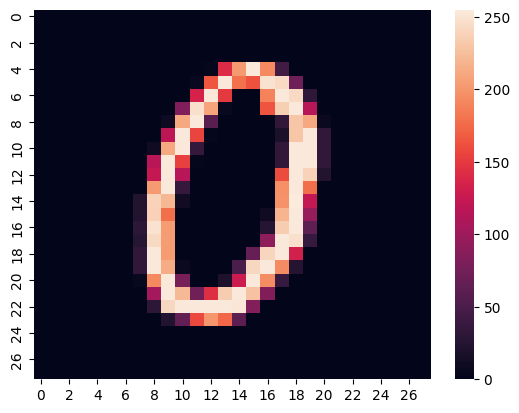

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
sns.heatmap(X.iloc[5].values.reshape(28,28))

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [9]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.52843667e-07, 1.02705522e-06,
       4.83887620e-07, 5.88114417e-06, 1.02967200e-06, 1.54993337e-06,
       3.45158267e-06, 4.62042871e-06, 2.86859929e-06, 3.61493617e-06,
       2.80919827e-06, 9.75935852e-07, 5.26396553e-07, 0.00000000e+00,
       6.20908128e-06, 5.08804542e-07, 4.91473838e-07, 2.55533380e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [10]:
rf.feature_importances_.shape

(784,)

<Axes: >

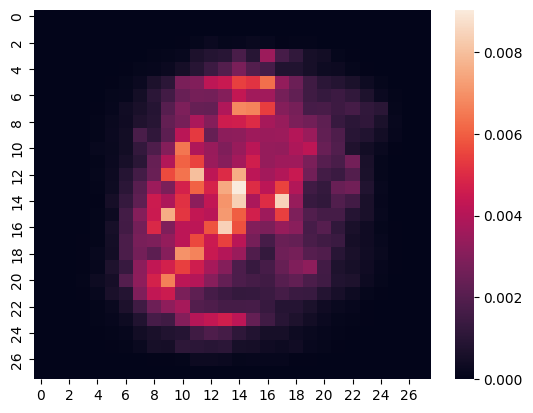

In [11]:
sns.heatmap(rf.feature_importances_.reshape(28,28))

# How Feature Importance Is Calculated

In [12]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [38]:
X,y = make_classification(n_samples=10, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=9)

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'x[1] <= -0.757\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[1] <= -0.17\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[1] <= -0.682\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

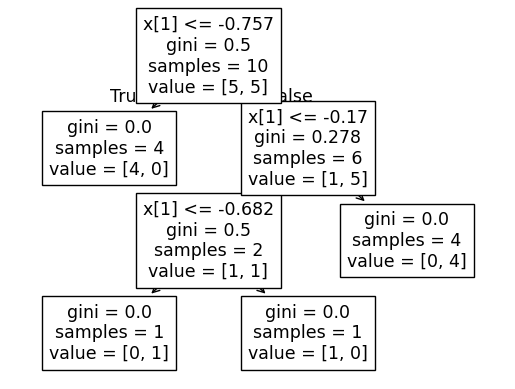

In [40]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [41]:
clf.feature_importances_

array([0., 1.])

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [43]:
rf.feature_importances_

array([0.275, 0.725])

In [44]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

print((1 + 0.555)/2)

[0.55 0.45]
[0. 1.]
0.7775000000000001


In [45]:
X,y = make_classification(n_samples=15, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.444\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

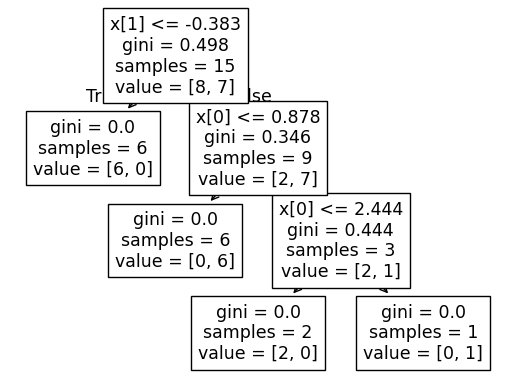

In [48]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [49]:
clf.feature_importances_

array([0.41666667, 0.58333333])